# Iris Flower Classification

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
import warnings
warnings.filterwarnings('ignore')

## Dataset

In [25]:
df = pd.read_csv('Iris dataset.csv')

In [26]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
df.shape

(150, 6)

In [28]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Remove null & duplicate values

In [29]:
df.isna().sum()
df.duplicated().sum()
df.drop_duplicates(inplace=True)

## Data Analysis

<Axes: xlabel='SepalLengthCm'>

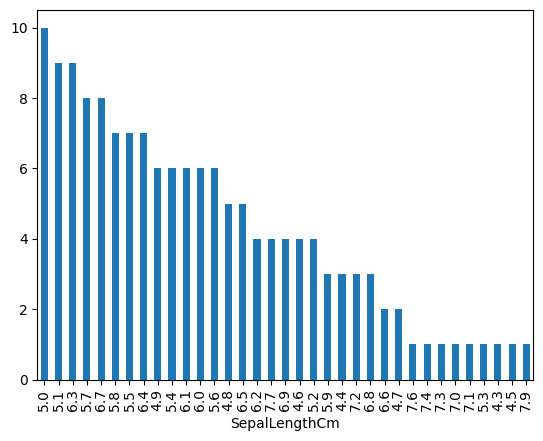

In [30]:
df['SepalLengthCm'].value_counts().plot(kind='bar')

<Axes: xlabel='SepalLengthCm', ylabel='Density'>

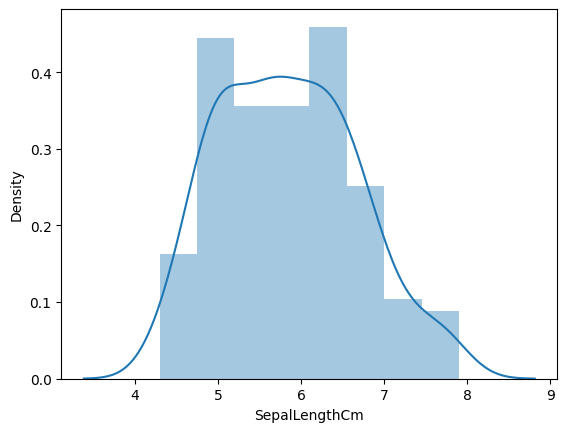

In [31]:
sns.distplot(df['SepalLengthCm'])

<Axes: xlabel='SepalWidthCm', ylabel='Density'>

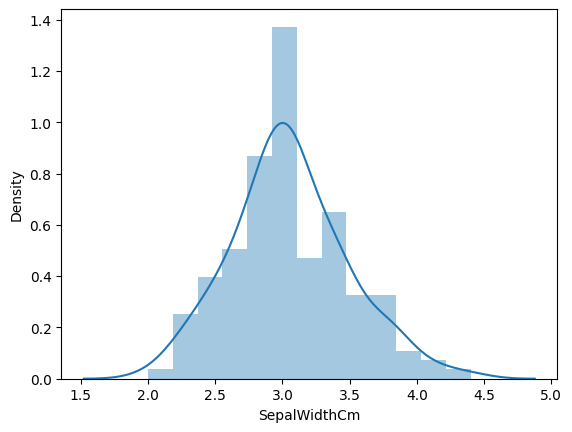

In [32]:
sns.distplot(df['SepalWidthCm'])

<Axes: xlabel='PetalLengthCm', ylabel='Density'>

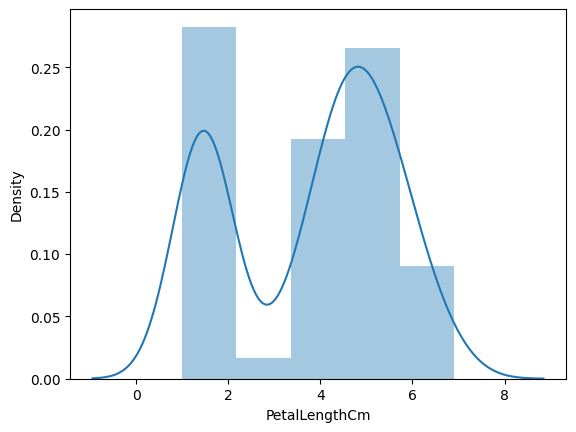

In [33]:
sns.distplot(df['PetalLengthCm'])

<Axes: xlabel='PetalWidthCm', ylabel='Density'>

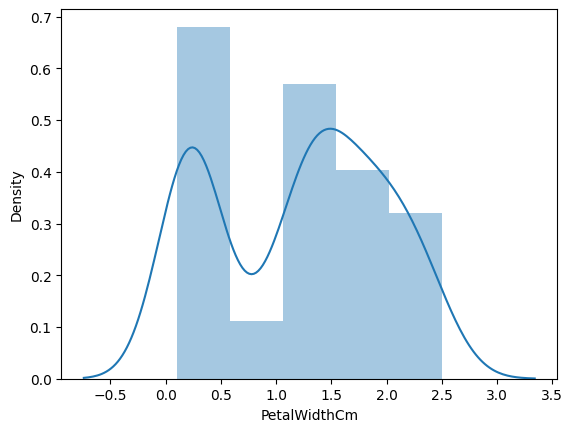

In [34]:
sns.distplot(df['PetalWidthCm'])

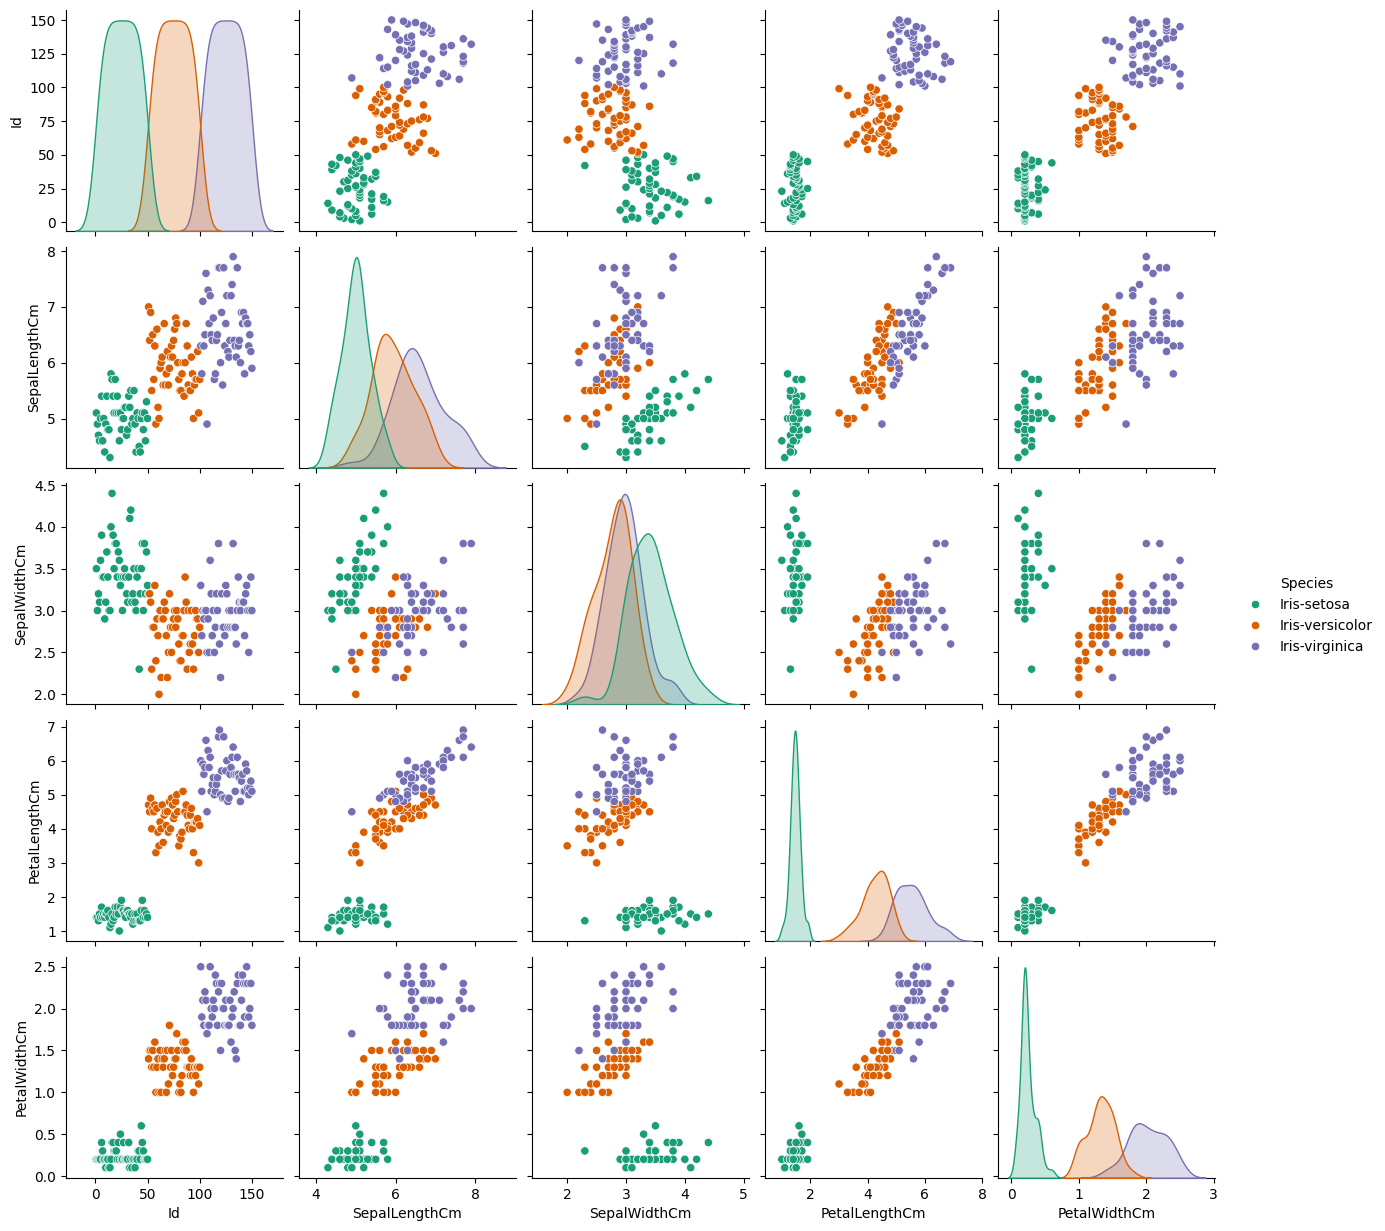

In [22]:
sns.pairplot(df,hue='Species', palette = 'Dark2')
plt.show()

<Axes: >

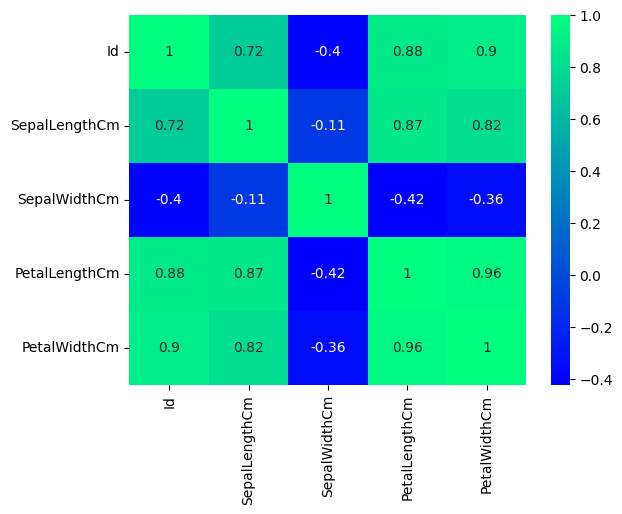

In [35]:
numerical_columns = df.select_dtypes(include=['number'])
sns.heatmap(numerical_columns.corr(),annot=True,cmap='winter')

Text(0.5, 1.0, 'Box plot')

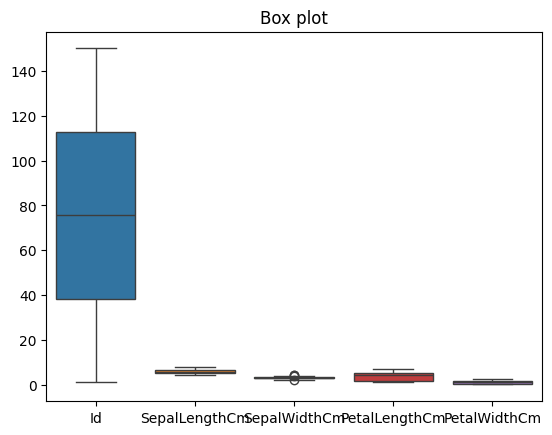

In [36]:
sns.boxplot(data=df)
plt.title('Box plot')

## Implement Model

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,roc_curve

In [38]:
X_train,X_test,y_train,y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1],test_size=0.2,random_state=2)

In [41]:
# Logistic Regression
log = LogisticRegression()
# fit the dataset
log.fit(X_train,y_train)

# Predict the response for test dataset 
y_pred = log.predict(X_test)

# Check the accuracy
print(f"The accuracy of the Logistic Regression is {accuracy_score(y_test,y_pred)*100}%")

The accuracy of the Logistic Regression is 100.0%


<Axes: >

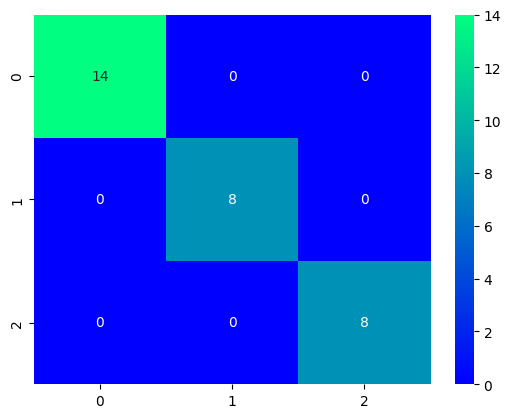

In [44]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,cmap='winter')